In [66]:
import pandas as pd

base_risco_credito = pd.read_csv('risco_credito.csv')

In [67]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


#### Pré processamento

In [68]:
# Divisão entre previsores e classe

x_risco_credito = base_risco_credito.iloc[:, 0:4].values
y_risco_credito = base_risco_credito.iloc[:, 4].values

In [69]:
# Transformando atributos categoricos em atributos numéricos com LabelEncoder

from sklearn.preprocessing import LabelEncoder

label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantias = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [70]:
x_risco_credito[:, 0] = label_encoder_historia.fit_transform(x_risco_credito[: , 0])
x_risco_credito[:, 1] = label_encoder_divida.fit_transform(x_risco_credito[: , 1])
x_risco_credito[:, 2] = label_encoder_garantias.fit_transform(x_risco_credito[: , 2])
x_risco_credito[:, 3] = label_encoder_renda.fit_transform(x_risco_credito[: , 3])

In [71]:
x_risco_credito

array([[3, 0, 1, 0],
       [2, 0, 1, 1],
       [2, 1, 1, 1],
       [2, 1, 1, 2],
       [2, 1, 1, 2],
       [2, 1, 0, 2],
       [3, 1, 1, 0],
       [3, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [1, 0, 1, 2],
       [3, 0, 1, 1]], dtype=object)

Devido a base de dados ser muito pequena , optamos por não fazermos o tratamento de atributos com OneHotEncoder.

In [72]:
# Salvar a base de dados para que não seja necessário fazer o pré-processamento novamente

import pickle

with open('risco_credito.pkl' , 'wb') as f:
    pickle.dump([x_risco_credito , y_risco_credito] , f)

## Naive Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB 

In [74]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(x_risco_credito , y_risco_credito)

GaussianNB()

In [75]:
# Dados X1 terão historia boa (0) , divida alta (0) , garantias nenhuma (1) , renda > 35 (2)
# Dados X2 terão historia ruim (2), divida alta (0) , garantias adequada (0) , renda < 15 (0)

previsao = naive_risco_credito.predict([[0 , 0 , 1 , 2 ]  , [ 2 , 0 , 0 , 0]])

In [76]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [77]:
naive_risco_credito.classes_  # Retorna as classes do modelo

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [78]:
naive_risco_credito.class_count_ # Quantidade de cada classe

array([6., 5., 3.])

In [79]:
naive_risco_credito.class_prior_ # Probabilidade a priori

array([0.42857143, 0.35714286, 0.21428571])

## Árvore de Decisão

In [80]:
from sklearn.tree import DecisionTreeClassifier

import pickle 

with open('risco_credito.pkl' , 'rb') as f:
    x_risco_credito , y_risco_credito = pickle.load(f)

In [81]:
x_risco_credito

array([[3, 0, 1, 0],
       [2, 0, 1, 1],
       [2, 1, 1, 1],
       [2, 1, 1, 2],
       [2, 1, 1, 2],
       [2, 1, 0, 2],
       [3, 1, 1, 0],
       [3, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [1, 0, 1, 2],
       [3, 0, 1, 1]], dtype=object)

In [82]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [83]:
arvore_risco_credito = DecisionTreeClassifier(criterion= 'entropy')

# treinamento

arvore_risco_credito.fit(x_risco_credito , y_risco_credito)
        

DecisionTreeClassifier(criterion='entropy')

In [84]:
arvore_risco_credito.feature_importances_   # Retorna a importância de cada um dos atributos

array([0.41391643, 0.06408636, 0.03885431, 0.4831429 ])

In [85]:
lista_classes = arvore_risco_credito.classes_
previsores = ['Historia' , 'Divida'  , 'Garantia' , 'Renda']
# filled -> Dá segmentação / cor a árvore

[Text(0.5, 0.9, 'Renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = alto'),
 Text(0.2, 0.7, 'Renda <= 0.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = alto'),
 Text(0.35, 0.8, 'True  '),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = alto'),
 Text(0.3, 0.5, 'Divida <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = alto'),
 Text(0.2, 0.3, 'Historia <= 1.0\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]\nclass = alto'),
 Text(0.1, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = alto'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.8, 0.7, 'Historia <= 2.5\nentropy = 1.149\nsamples = 7\nvalue = [1, 5, 1]\nclass = baixo'),
 Text(0.65, 0.8, '  False'),
 Text(0.7, 0.5, 'Historia <= 1.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5, 0]\nclass = baixo'),
 Text(0.6, 0.3, 'entropy = 0.

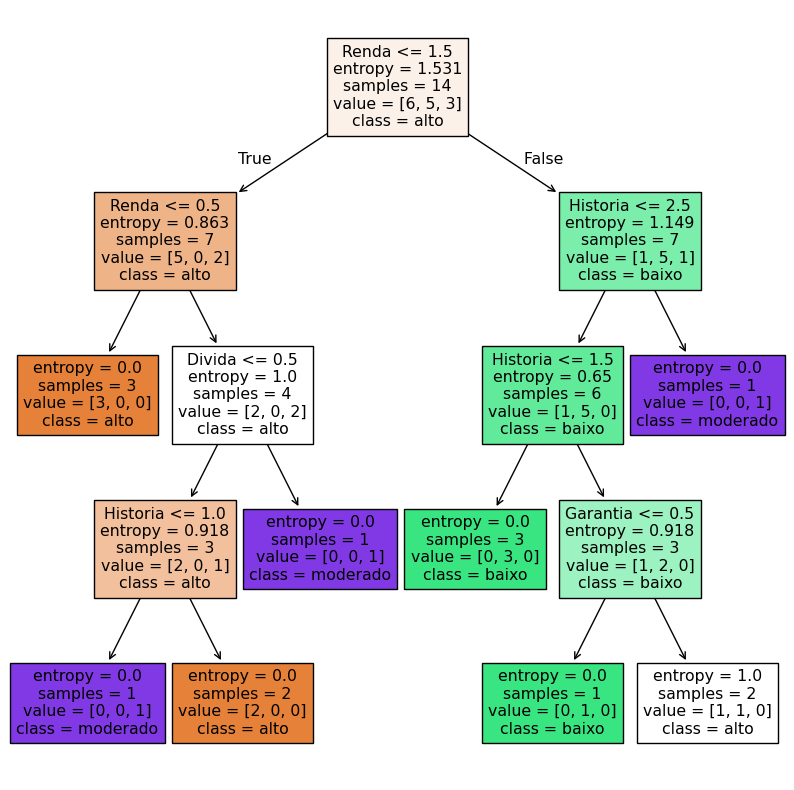

In [88]:
# Visualizando árvore

from matplotlib import pyplot as plt
from sklearn import tree


figura , eixos = plt.subplots(nrows =1 , ncols=1 , figsize=(10,10))
tree.plot_tree(arvore_risco_credito , feature_names=previsores , class_names=lista_classes , filled=True)




In [87]:
# Dados X1 terão historia boa (0) , divida alta (0) , garantias nenhuma (1) , renda > 35 (2)
# Dados X2 terão historia ruim (2), divida alta (0) , garantias adequada (0) , renda < 15 (0)

previsao = naive_risco_credito.predict([[0 , 0 , 1 , 2 ]  , [ 2 , 0 , 0 , 0]])

previsao

array(['baixo', 'moderado'], dtype='<U8')